In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:

df = pd.read_csv('/content/drive/MyDrive/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


<Axes: xlabel='Drug', ylabel='Count'>

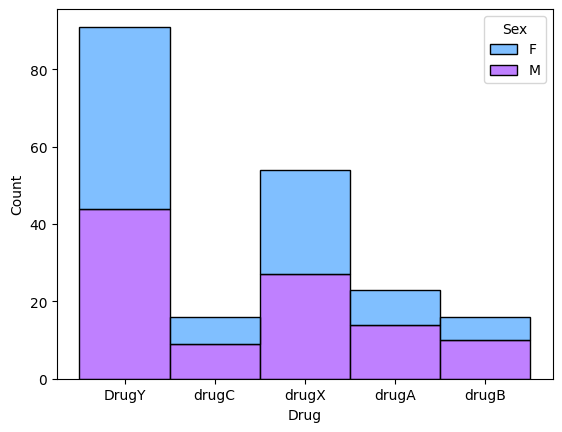

In [21]:
sns.histplot(x = 'Drug', hue = df['Sex'], multiple = 'stack', palette = 'cool', data = df)

In [22]:
def pie_graph(col):
    vc = df[col].value_counts()
    colors = cm.cool(np.linspace(0, 1, len(vc)))

    fig, ax = plt.subplots(figsize = (8, 6), subplot_kw = dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(vc, autopct = '%1.1f%%', textprops=dict(color="w", fontsize = 15),
                                      wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}, colors = colors)

    ax.legend(wedges, vc.index, title = col, loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

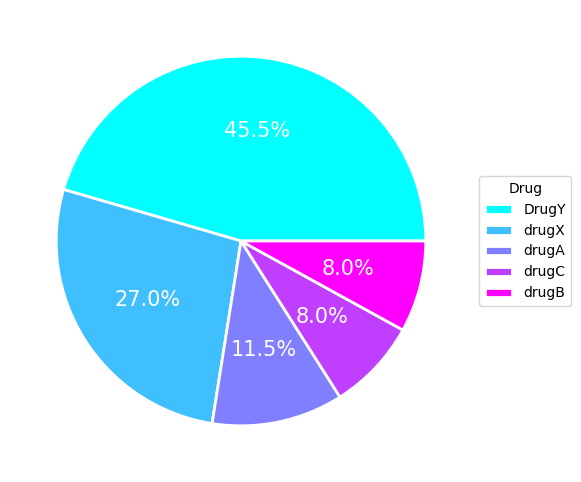

In [23]:
pie_graph('Drug')

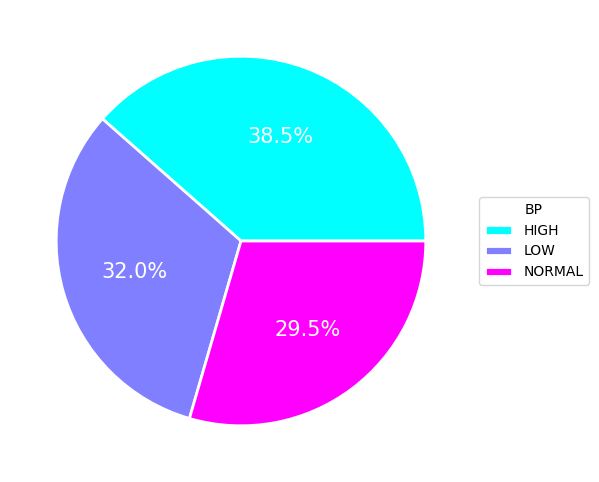

In [24]:
pie_graph('BP')

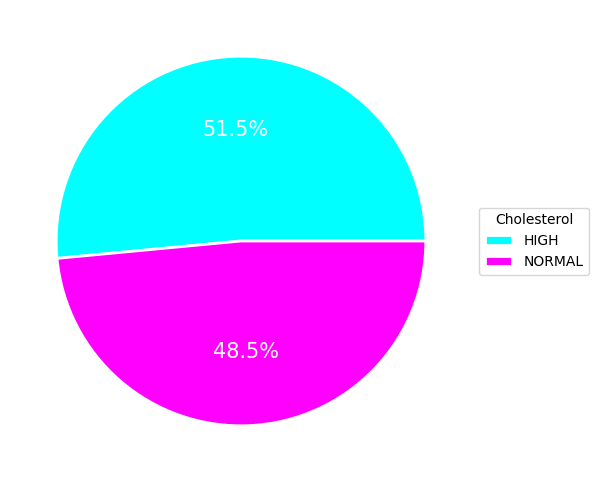

In [25]:
pie_graph('Cholesterol')

<Axes: xlabel='Na_to_K', ylabel='Count'>

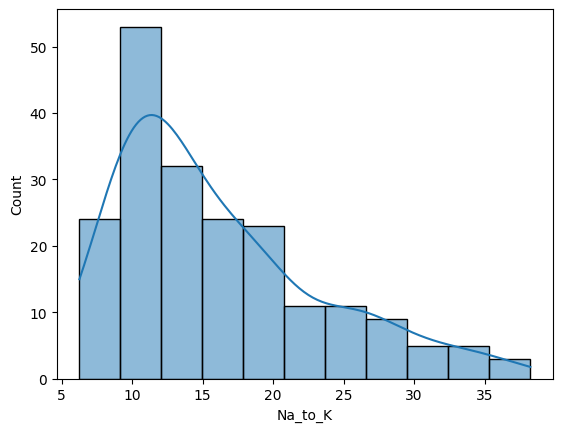

In [26]:
sns.histplot(x = df['Na_to_K'], kde = True)

<ipython-input-27-acef9d57ec18>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

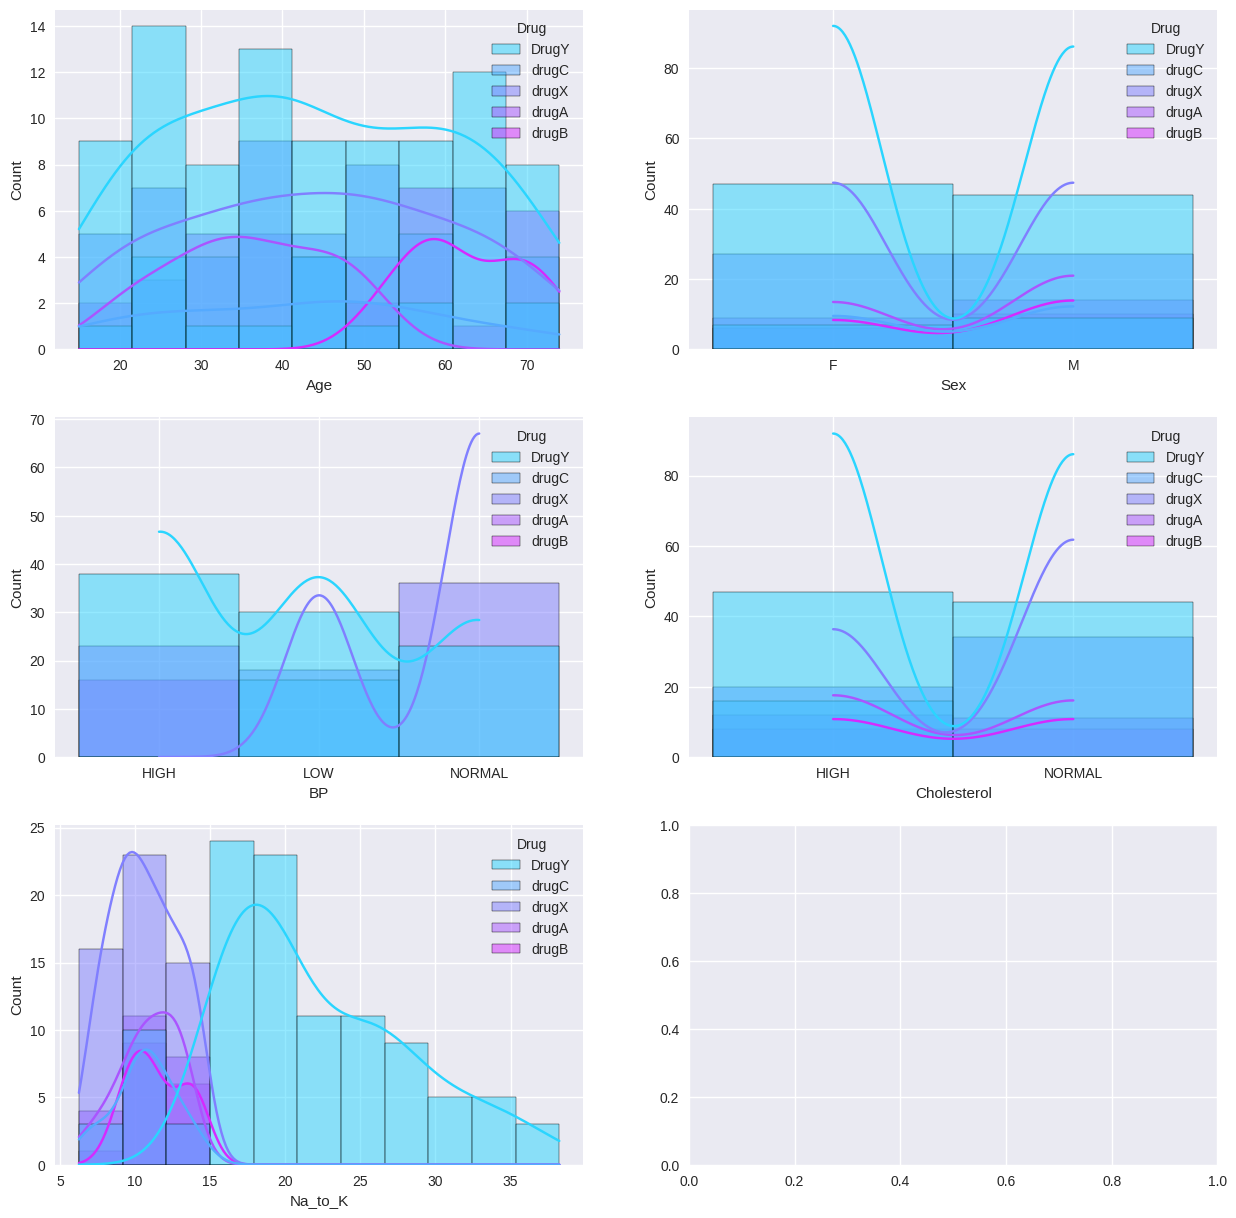

In [27]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'cool'

fig, axs = plt.subplots(3, 2, figsize=(15,15))
i=1
for feature in df.columns:
    if feature not in ["Drug"] and i < 14:
        plt.subplot(3,2,i)
        sns.histplot(data = df, x = feature, kde = True, palette = color, hue = 'Drug')
        i+=1

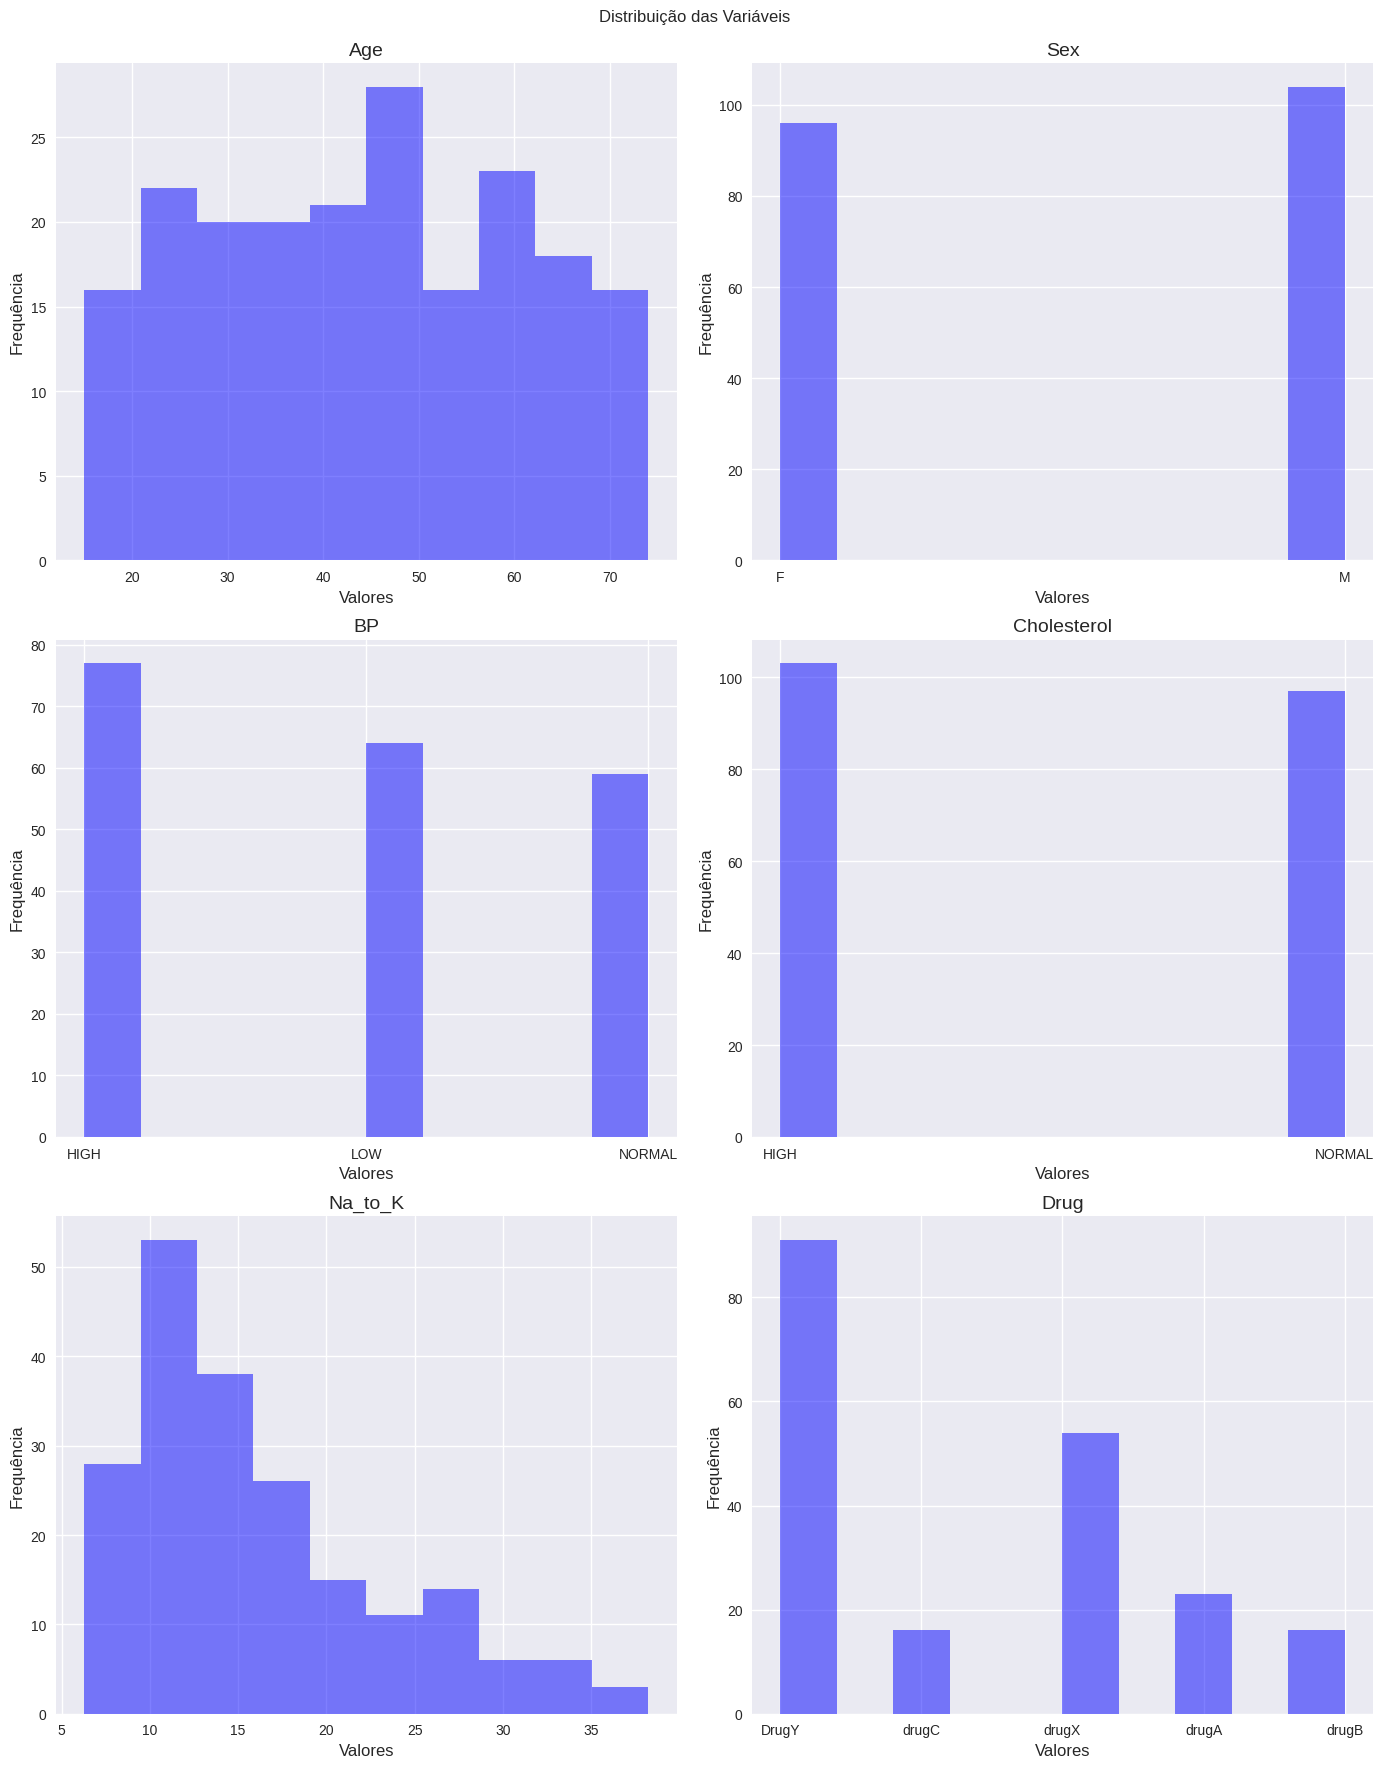

In [28]:
list_columns = list(df.columns)

fig, axs = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Distribuição das Variáveis')

for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(df[column], color = 'blue', alpha = 0.5)
    ax.set_title(column, fontsize = 14)
    ax.set_xlabel('Valores', fontsize = 12)
    ax.set_ylabel('Frequência', fontsize = 12)
    ax.grid(True)
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

<ipython-input-29-d721208c439b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')


<Axes: >

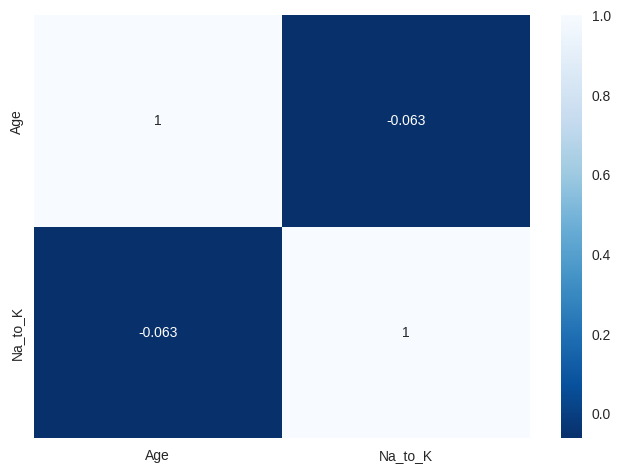

In [29]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')

In [30]:
from sklearn.preprocessing import LabelEncoder

list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [31]:
X = df.drop('Drug', axis = 1)
y = df['Drug']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [33]:
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'random_state': [0]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)

grid_search.fit(xtrain, ytrain)

print("Best parameters: ", grid_search.best_params_)

ypred = grid_search.predict(xtest)
accuracy = accuracy_score(ytest, ypred)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [34]:
print('Accuracy:', accuracy)

Accuracy: 0.98


In [35]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        13

    accuracy                           0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50



<Axes: >

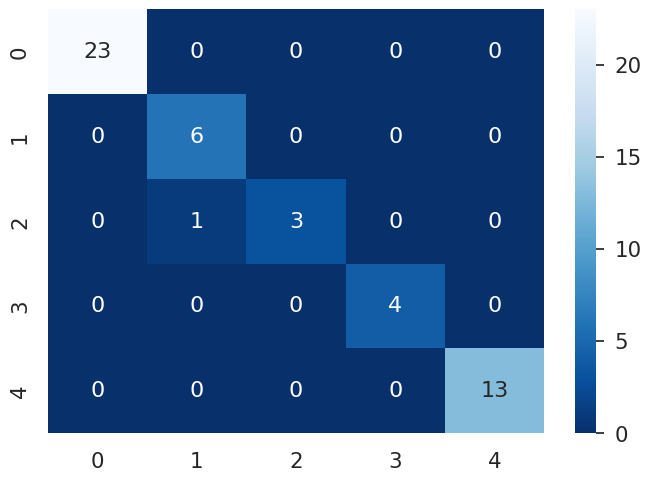

In [36]:
conf_matrix = confusion_matrix(ytest, ypred)
sns.set(font_scale = 1.4)
sns.heatmap(conf_matrix, cmap = 'Blues_r', annot = True, annot_kws = {'size' : 16}, fmt = 'g')